<a href="https://colab.research.google.com/github/honyango/Analog-World-Clock/blob/master/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing The Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ms data analytics Groups/January-Session/Classification Algorithms/Social_Network_Ads.csv")

<h3>We are avoiding the first two columns because our model will classify whether an item is purchased od not</h3>

In [ ]:
# Selecting the columns
X = df.iloc[:, [2,3]].values
Y = df.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.25,
                                                    random_state=0)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Build our Classifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
#Predicting The Results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
#Comparing the results
cm = confusion_matrix(y_pred, Y_test)
cm

array([[64,  4],
       [ 4, 28]])

In [ ]:
acc = accuracy_score(y_pred, Y_test)
print("The accuracy is: {}%".format(acc*100))

The accuracy is: 92.0%


<h3>Building a text report showing the main classification metrics</h3>

In [ ]:
cr = classification_report(y_pred, Y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



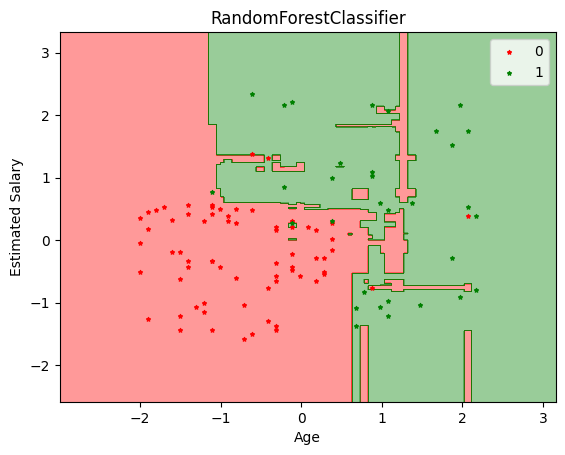

In [ ]:
# Visualization of the classifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Visualising the Test set results
x_set, y_set = X_test, Y_test

#Creating the grid of Minimum and maximun values from X_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1,
                               stop = x_set[:, 0].max() + 1,
                               step = 0.01),
                    np.arange(start = x_set[:, 1].min() - 1,
                              stop = x_set[:, 1].max() + 1,
                              step = 0.01))

# Create a ListedColormap with two colors
cmap = ListedColormap(['red', 'green'])

# Plotting the decision boundary
plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4,
             cmap = cmap)

#Plotting The Datapoint in red and gree color
# Plotting the datapoints in red and green color
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0],
                x_set[y_set == j, 1],
                c = cmap(i),  # Use cmap for coloring
                label = j,
                s = 8,
                marker = '*')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title("RandomForestClassifier")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()